<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/Qualificacao/PSD_histogram_CNN_B_r_squared_jun_23_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score

In [2]:
!pip install mahotas

In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [5]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado


In [6]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[4] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [7]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [8]:
from segment_filter_not_conclude import Segmenta  # got image provided segmented

In [9]:
df=Segmenta(img)
Img_Size = 28

In [10]:
print(df)

    Width           0           1  ...         781         782         783
0     103  173.743240  179.576965  ...    0.032237    0.920822    1.593835
1     102  130.303741  129.710129  ...  142.008087  145.155350  143.438324
2     151  178.161407  193.273819  ...    0.002412    0.296785    1.378229
3     192  134.317261  138.990860  ...   54.792099   55.437496   69.529945
4     136   60.963673   43.102077  ...    1.000000    1.000000    1.000000
5     109  139.218414  138.203339  ...  171.498352  160.590942  141.680908
6     113  174.241196  173.825348  ...   95.138687  100.554001  111.080269
7     199  214.498871  204.427963  ...    1.413878    1.086715    0.305674
8     175  205.086395  208.628799  ...  128.734390  137.416000  140.039993
9     168  157.305557  157.666672  ...  146.916672  130.916672  124.611115
10    193  122.173424  120.602058  ...  173.716064  159.382294  143.834015
11    144  176.685959  165.228409  ...    1.000000    1.000000    1.426697
12    101   99.802963  13

In [11]:
'''
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines
# filename = 'model_ANN.pkl'
filename = 'model_ANN_new.pkl'
model = joblib.load(filename)
'''

"\n!git clone https://github.com/ucfilho/MarquesGabi_Routines\n%cd MarquesGabi_Routines\n# filename = 'model_ANN.pkl'\nfilename = 'model_ANN_new.pkl'\nmodel = joblib.load(filename)\n"

In [12]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [13]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [14]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [15]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

model = Sequential()


# make the CNN
# model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=32, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=200))
model.add(Dropout(0.2))
model.add(Dense(units=10))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:

# gives us back a <keras.callbacks.History object at 0x112e61a90>
model.fit(X_train, Y_train, epochs=200, batch_size=32)


Epoch 1/200
11/11 [==============================] - 19s 44ms/step - loss: 0.6684 - accuracy: 0.6855
Epoch 2/200
11/11 [==============================] - 0s 44ms/step - loss: 0.3538 - accuracy: 0.7979
Epoch 3/200
11/11 [==============================] - 0s 45ms/step - loss: 0.2263 - accuracy: 0.9143
Epoch 4/200
11/11 [==============================] - 0s 43ms/step - loss: 0.2013 - accuracy: 0.9195
Epoch 5/200
11/11 [==============================] - 0s 45ms/step - loss: 0.1224 - accuracy: 0.9598
Epoch 6/200
11/11 [==============================] - 0s 44ms/step - loss: 0.0871 - accuracy: 0.9783
Epoch 7/200
11/11 [==============================] - 0s 44ms/step - loss: 0.0389 - accuracy: 0.9915
Epoch 8/200
11/11 [==============================] - 0s 43ms/step - loss: 0.0600 - accuracy: 0.9792
Epoch 9/200
11/11 [==============================] - 1s 45ms/step - loss: 0.0553 - accuracy: 0.9836
Epoch 10/200
11/11 [==============================] - 0s 42ms/step - loss: 0.0545 - accuracy: 0.982

In [17]:
Y_test = yback(Y_test)

In [18]:
pred_test= model.predict_classes(X_test)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Predict   0   1
Actual         
0        70   2
1         4  71


In [19]:
pred_test

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [20]:
cont = 0; num =25
img_graos = []
Width_new = []
img=ww[0] 
while( cont < num):
  df=Segmenta(img)
  df_ann =df.copy()
  Width = df['Width']
  del df_ann['Width']
  result = np.array(df_ann)
  result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
  prediction = model.predict_classes(result)
  loc_grao =[];k=0
  for i in prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      Width_new.append(Width.iloc[k])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


    Width           0           1  ...         781         782         783
0   117.0  106.801811  106.755936  ...   43.292130   40.190228   37.402004
2   114.0  147.666351  153.332703  ...   68.769157   58.743919   60.826408
3   108.0   61.751713   56.814816  ...   60.423866   62.969814   66.141289
4   130.0   81.817047   82.933723  ...   76.745560   76.627457   75.381546
5   102.0  140.507126   67.572861  ...   30.739334   30.867363   32.279892
6   111.0   74.736549   76.632011  ...   87.828102   84.300385   82.054619
7   101.0   51.125381   52.823059  ...   84.492203   81.918442   79.770416
8   140.0   67.919998   63.439999  ...   72.239998   72.959999   76.040001
9   111.0  119.955032  131.000565  ...   31.322620   27.438194   27.572601
10  113.0  123.827087  125.547028  ...   93.313263   94.190224   94.006821
11  177.0   65.921700   55.897945  ...    0.000000    0.000000    0.000000
12  187.0  123.463791  132.418396  ...   59.789642   60.760494   56.470642
13  140.0  100.879997   9

In [21]:
Width=np.array(Width_new)

In [22]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

fatal: destination path 'marquesgabi_paper_fev_2021' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [23]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020
%cd marquesgabi_out_2020
PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))

fatal: destination path 'marquesgabi_out_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020
   Juntas   Area
0       1  2.001
1       2  0.820
2       3  1.270


In [24]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [25]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,117.0,106.801811,106.755936,108.009567,111.697357,116.175400,120.144722,123.486237,124.622330,96.434654,30.150488,24.978304,28.179998,27.308205,26.475565,27.326029,28.286362,29.363943,29.821096,30.251734,28.253927,25.945578,22.761999,21.616554,23.846373,24.232231,24.312004,26.572943,28.125429,105.484116,106.270447,106.803200,109.783844,114.089485,117.888741,120.301636,107.583099,40.931847,26.364819,28.177660,...,131.838913,119.884796,106.965744,78.188622,42.847321,38.807438,40.177147,40.331871,38.630581,39.672874,33.828037,33.974724,32.908318,20.783401,58.739937,87.111618,95.200012,100.631973,102.541092,105.255531,108.051575,128.293228,147.065750,143.824753,142.002853,142.205643,142.321350,141.314713,133.690933,105.960037,97.630508,65.454163,43.010517,39.974358,43.658924,44.394260,42.926582,43.292130,40.190228,37.402004
2,114.0,147.666351,153.332703,151.000931,144.096634,140.919662,138.582321,136.400116,131.851028,94.619270,53.218838,51.214527,50.155743,48.185600,48.719910,50.559555,50.742996,51.982769,50.669125,46.564789,42.453983,41.899971,43.360107,45.324097,47.647892,48.143124,50.891045,54.130505,55.123425,148.562637,153.578949,152.018463,146.445084,146.251144,146.027710,146.179749,145.674973,140.293015,86.036942,53.721760,...,91.115723,91.746071,95.786392,102.287476,103.991692,101.957832,96.293015,91.586334,87.728226,79.180984,70.992615,68.264999,110.251160,111.393044,112.224686,110.294861,107.022476,100.456139,86.083107,63.558628,45.695904,42.117577,50.309322,68.315483,77.939674,83.016922,86.262543,88.562943,90.984612,92.000305,96.328720,101.418900,101.345337,98.801788,93.864571,88.287476,80.711914,68.769157,58.743919,60.826408
3,108.0,61.751713,56.814816,54.174210,53.238686,50.882027,50.668037,50.768173,52.606312,53.082302,55.192043,57.352539,57.272976,54.327847,54.618652,104.997253,117.068581,122.757202,131.943756,139.495193,137.838135,133.123459,128.480103,126.703697,127.042519,127.935516,131.709183,135.331955,132.989029,60.652946,54.122078,52.212620,51.776409,50.067215,50.481480,49.824417,51.503429,53.665295,53.622772,54.165981,...,56.920437,56.255138,54.529491,49.299034,46.203011,43.045265,45.898487,53.282574,57.769550,60.155006,62.392315,66.220848,64.780518,63.742111,62.677639,68.282578,73.798355,75.334702,74.989021,78.308640,80.031548,73.477364,63.554180,58.547325,56.706444,57.452675,57.917694,59.268860,56.744854,51.543209,50.096024,47.229080,44.330585,45.585735,46.765430,51.714680,57.592590,60.423866,62.969814,66.141289
4,130.0,81.817047,82.933723,83.960709,80.516449,73.207336,70.756218,68.805679,68.885689,70.922134,72.759773,73.838577,74.182243,72.582489,81.432671,104.030060,112.146988,109.338707,108.297752,108.181305,103.877876,98.382256,102.224144,101.258705,104.059647,105.293259,106.396217,104.577049,100.922134,73.379173,76.760475,76.347458,69.745796,64.200951,61.168522,61.873135,63.662960,65.666275,65.715508,65.899170,...,48.942726,54.282368,56.655621,58.317638,63.334911,66.544853,70.037407,72.965210,76.792892,80.398582,79.883789,77.719528,56.913849,56.524261,58.021545,59.702957,60.023197,60.764973,61.614204,60.832191,58.378227,54.609703,54.213730,53.591713,52.732075,54.093491,49.774910,40.057514,39.277397,45.140594,49.239288,53.733967,58.153374,60.920242,64.569466,68.578461,72.174202,76.745560,76.627457,75.381546
5,102.0,140.507126,67.572861,18.019993,21.102655,23.309113,18.238754,16.017302,17.009228,24.944637,29.322954,30.496737,32.432144,32.922340,32.707039,31.951561,30.199156,29.338333,30.390236,30.984241,29.551712,28.585932,28.456751,29.778164,30.568628,31.524418,32.528645,33.073051,33.710503,140.298752,141.551346,40.241447,22.501348,26.196466,24.958479,25.492889,23.748945,26.128029,29.728184,32.107655,...,36.996159,39.878899,39

In [26]:
Area = np.array(PSD_new['Area'])
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

In [27]:
X.shape

(490, 784)

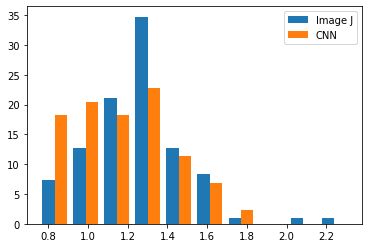

In [28]:
 wt1 = np.ones(len(Diam1)) / len(Diam1)*100
 wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
 X = pd.DataFrame([Diam1,Diameter_All])
 wts = pd.DataFrame([wt1,wt2])
plt.hist(X,weights=wts)
plt.legend(['Image J','CNN'])

(array([[0.07368421, 0.2       , 0.41052632, 0.75789474, 0.88421053,
         0.96842105, 0.97894737, 0.97894737, 0.98947368, 1.        ],
        [0.18181818, 0.38636364, 0.56818182, 0.79545455, 0.90909091,
         0.97727273, 1.        , 1.        , 1.        , 1.        ]]),
 array([0.75356807, 0.90995518, 1.06634229, 1.22272941, 1.37911652,
        1.53550363, 1.69189074, 1.84827785, 2.00466497, 2.16105208,
        2.31743919]),
 <a list of 2 Lists of Patches objects>)

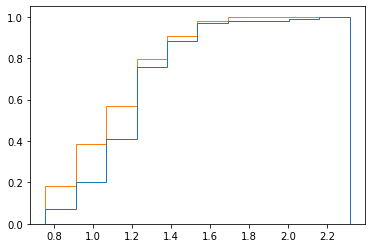

In [29]:
# plt.hist(x, bins=bins, density=True, histtype='step', cumulative=-1,label='Reversed emp.')
plt.hist(X, density=True, histtype='step', cumulative=True,label='Reversed emp.')

r_squared = 0.9358173945308339


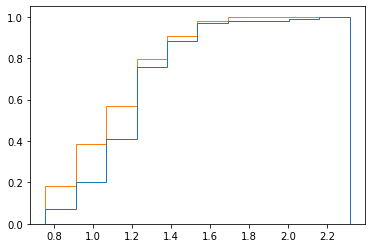

In [30]:
Obj = plt.hist(X, density=True, histtype='step', cumulative=True,label='Reversed emp.')
Y1, Y2 = Obj[0]
print('r_squared =',r2_score(Y1, Y2))

<a list of 2 Lists of Patches objects>
[0.75356807 0.90995518 1.06634229 1.22272941 1.37911652 1.53550363
 1.69189074 1.84827785 2.00466497 2.16105208 2.31743919]
[[ 7.36842105 12.63157895 21.05263158 34.73684211 12.63157895  8.42105263
   1.05263158  0.          1.05263158  1.05263158]
 [18.18181818 20.45454545 18.18181818 22.72727273 11.36363636  6.81818182
   2.27272727  0.          0.          0.        ]]


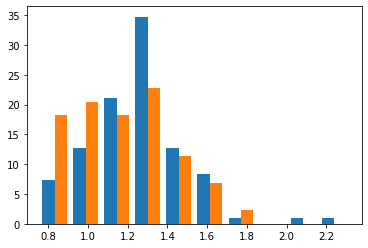

In [31]:
counts, bins, bars = plt.hist(X,weights=wts)
print(bars)
print(bins)
print(counts)

In [32]:
print(counts.sum())

200.0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


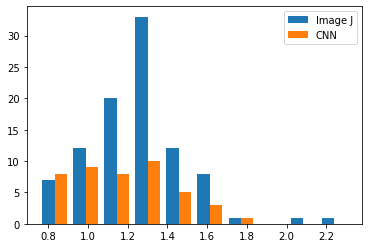

In [33]:

plt.hist([Diam1,Diameter_All])
plt.legend(['Image J','CNN'])


In [34]:
[Diam1,Diameter_All]

[[1.59616801403081,
  1.0217907939900581,
  1.2716187407449044,
  1.104429030701514,
  1.2163487785097904,
  1.6013445735058454,
  1.1715597420637607,
  1.2534662333717612,
  1.2676073151634049,
  1.309600575274104,
  1.292966945531582,
  1.7658322811231006,
  1.3564037533648712,
  1.2407040781688483,
  2.130217298173151,
  1.4228319915327,
  1.0651086490865755,
  1.3008210311003705,
  1.336545951796433,
  0.8927754224911278,
  1.4494292838262302,
  1.4052738287907582,
  1.6421697097891788,
  1.2329833804288621,
  1.19042665178928,
  1.1682948223612457,
  1.1518314137121108,
  0.9607802401865855,
  2.317439190074449,
  1.0591147430338594,
  1.4308630919602832,
  0.7535680705496237,
  0.8608283307581511,
  1.2776122636975893,
  1.3745862957220916,
  1.259546137598783,
  1.2978813187979172,
  1.2412170838050638,
  1.6009469708743893,
  1.3149369953539032,
  1.417901703622935,
  1.2478669653497139,
  1.1055812783082735,
  0.9561307405997607,
  0.9487783503683882,
  1.1238565871041026,
  1